In [3]:
# 필요한 패키지 설치
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
import matplotlib.font_manager as fm

#설치된 폰트
font_list = [font.name for font in fm.fontManager.ttflist]

#글꼴설정
plt.rcParams["font.family"] = 'Gulim'
sns.set(font='Gulim')

In [5]:
# 데이터 불러오기
df = pd.read_csv('서울시 부동산 실거래가 정보.csv', encoding='euc-kr')

df.head()

C:\Users\qksw5\AppData\Local\Temp\ipykernel_29748\3244565055.py:2: DtypeWarning: Columns (7,15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('서울시 부동산 실거래가 정보.csv', encoding='euc-kr')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11530,구로구,10200,구로동,1.0,대지,97.0,0.0,로제리움2차,...,12000,14.91,0.00,14.0,NaN,NaN,2014.0,아파트,중개거래,서울 구로구
1,2023,11530,구로구,10900,궁동,1.0,대지,197.0,1.0,궁동빌라,...,30000,45.75,59.30,2.0,NaN,NaN,1991.0,연립다세대,중개거래,서울 구로구
2,2023,11650,서초구,10200,양재동,1.0,대지,249.0,11.0,하우스천사(249-11),...,30500,28.42,16.50,3.0,NaN,NaN,2012.0,연립다세대,중개거래,서울 서초구
3,2023,11440,마포구,12000,서교동,1.0,대지,353.0,1.0,서교타워,...,23000,46.94,58.25,11.0,NaN,NaN,1999.0,오피스텔,직거래,NaN
4,2023,11470,양천구,10300,신월동,1.0,대지,44.0,20.0,우일빌라(나),...,10000,41.18,38.73,-1.0,NaN,NaN,1988.0,연립다세대,중개거래,서울 양천구


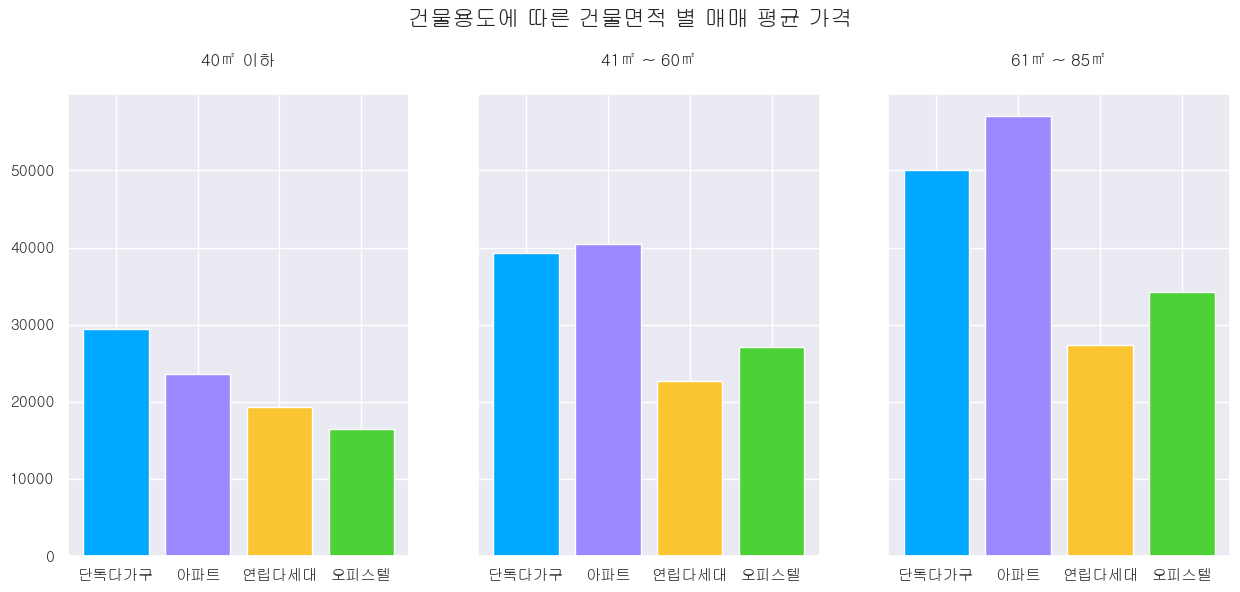

In [6]:
df1 = df.copy()

#원하는 열 선택
df1 = df1[["물건금액(만원)", "건물면적(㎡)", "건물용도"]]

#40이하
filtered_df1 = df1[df1['건물면적(㎡)'] <= 40]
filtered_df1 = filtered_df1.groupby('건물용도')[['물건금액(만원)']].mean()
filtered_df1['물건금액(만원)'] = filtered_df1['물건금액(만원)'].round(2)

#41~60
filtered_df2 = df1[(df1['건물면적(㎡)'] > 40) & (df1['건물면적(㎡)'] <= 60)]
filtered_df2 = filtered_df2.groupby('건물용도')[['물건금액(만원)']].mean()
filtered_df2['물건금액(만원)'] = filtered_df2['물건금액(만원)'].round(2)

#61~85
filtered_df3 = df1[(df1['건물면적(㎡)'] > 60) & (df1['건물면적(㎡)'] <= 85)]
filtered_df3 = filtered_df3.groupby('건물용도')[['물건금액(만원)']].mean()
filtered_df3['물건금액(만원)'] = filtered_df3['물건금액(만원)'].round(2)

#1x3 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True) #y축 범위 일치시키기

#막대 1
ax[0].bar(filtered_df1.index, filtered_df1['물건금액(만원)'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[0].set_title('40㎡ 이하', pad=20)

#막대 2
ax[1].bar(filtered_df2.index, filtered_df2['물건금액(만원)'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[1].set_title('41㎡ ~ 60㎡', pad=20)

#막대 3
ax[2].bar(filtered_df3.index, filtered_df3['물건금액(만원)'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[2].set_title('61㎡ ~ 85㎡', pad=20)

fig.suptitle('건물용도에 따른 건물면적 별 매매 평균 가격', fontsize=16, fontweight='bold', y=1.02)

#그래프 출력
plt.show()

서울시 부동산 실거래가 데이터를 건물 용도와 건물 면적에 따른 매매 평균 가격을 막대 차트로 시각화한 그래프입니다.
40㎡(12평) 이하에서는 오피스텔이 가장 저렴하고, 40㎡ 이상 부터는 연립다세대 주택이 가장 저렴합니다.
하지만 이 그래프는 평균 값이고, 건물가격의 최저 값과 최대 값의 차이가 컸습니다.
같은 건물 용도와 면적이라도, 지역과 층(반지하 여부), 기준 금리 등에 따라 가격이 천차만별입니다.

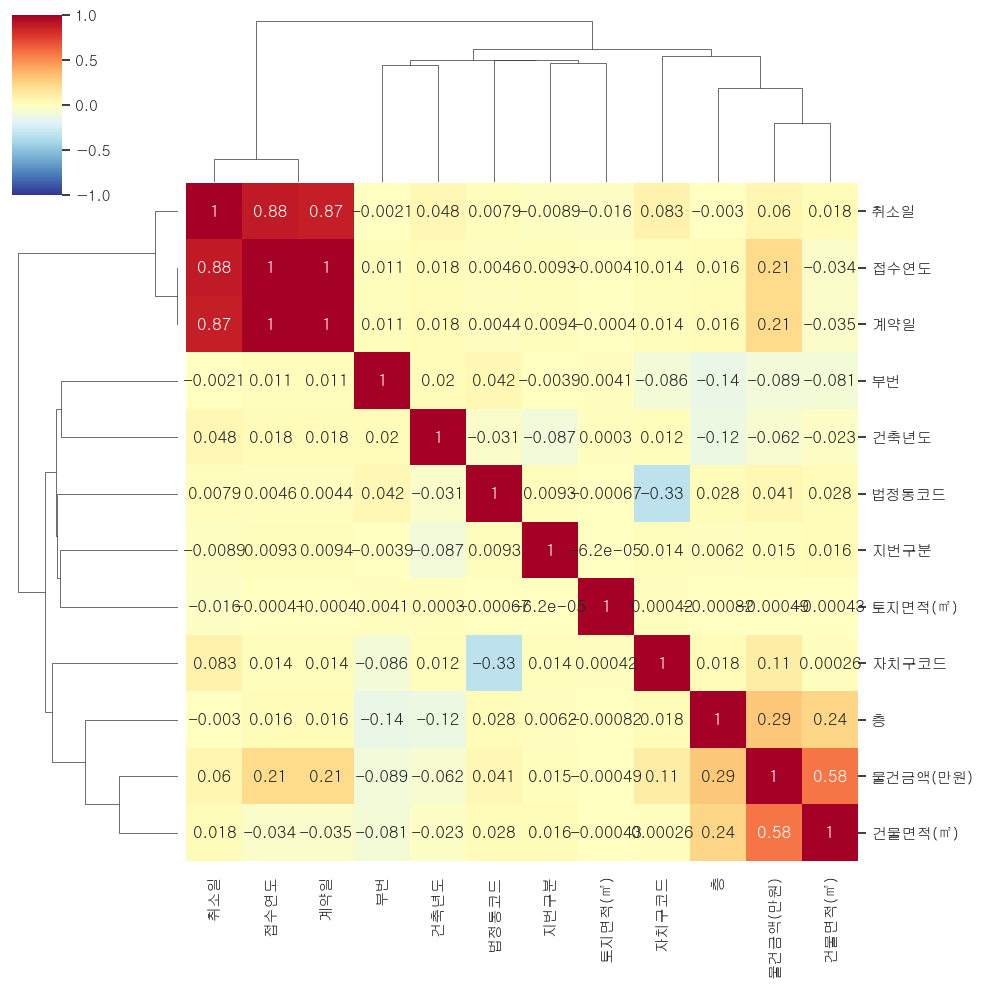

In [14]:
#문자열 데이터가 포함된 열 제거
c_df = df.select_dtypes(exclude='object').copy()

sns.clustermap(c_df.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

sns의 clustermap을 이용한 각 속성들의 상관계수 행렬 그래프입니다. 
상관계수 행렬을 만들기 위해서는 모든 변수가 숫자형 데이터여야 하기 때문에 자치구명, 법정동명 등 문자열 데이터를 갖고있는 열을
전처리 과정에서 제거했습니다.

취소일, 접수연도, 계약일을 제외하고 엄청 큰 상관관계는 없었습니다.
층, 건물 면적, 물건금액(집값)은 어느정도 상관관계가 있다는 결과가 도출되었습니다. 

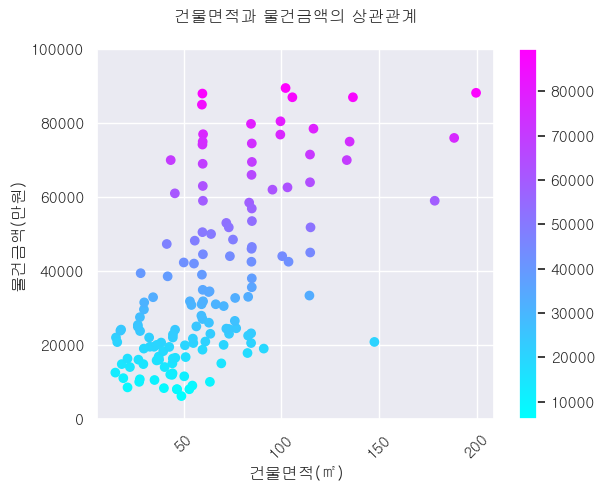

In [8]:
df2 = df.copy()

#원하는 열 선택
df2 = df2[["물건금액(만원)", "건물면적(㎡)", "건물용도"]]

#랜덤샘플링
df2 = df2.sample(n=150, random_state=1)

#IQR 계산
Q1 = df2['물건금액(만원)'].quantile(0.25)
Q3 = df2['물건금액(만원)'].quantile(0.75)
IQR = Q3 - Q1

#이상치 제거
df_filtered = df2[~((df2['물건금액(만원)'] < (Q1 - 1.5 * IQR)) | (df2['물건금액(만원)'] > (Q3 + 1.5 * IQR)))]

#산점도
plt.scatter(df_filtered['건물면적(㎡)'], df_filtered['물건금액(만원)'], c=df_filtered['물건금액(만원)'], cmap='cool')

#색상 막대
cbar = plt.colorbar()

#라벨
plt.xlabel('건물면적(㎡)')
plt.ylabel('물건금액(만원)')
plt.xticks(rotation=45)  # x축 눈금 각도 설정
plt.yticks(range(0, 100001, 20000))  # y축 눈금 범위 및 간격 설정
plt.title('건물면적과 물건금액의 상관관계', pad=20)

plt.show()

clustermap을 보았을 때 가장 높은 상관관계를 가진 건물면적과 물건금액의 상관 관계를 시각화한 그래프입니다.
IQR을 통해 이상치를 제거하고, 표본이 너무 많아서 그래프 확인이 어렵기 때문에 데이터 프레임에서 랜덤 샘플링으로 150개의 표본만 산점도로 시각화했습니다.

건물면적이 크면 집값이 비싸진다는 건 당연한 사실입니다.
시각화한 결과를 보면, 예상과 같이 대각선 형태로 분포가 되어있고 건물 면적과 집값은 상관관계를 갖고 있다는 결과가 도출되었습니다.

50㎡는 약 15평입니다. 0~30평이 가장 표본이 많고(랜덤 샘플링 결과마다 조금씩 상이함) 똑같은 평수여도 가격이 크게 다르다는 것을 알 수 있습니다.
이는 건물면적 외에도 집 값에 영향을 주는 다른 속성이 많다는 것을 알 수 있습니다.

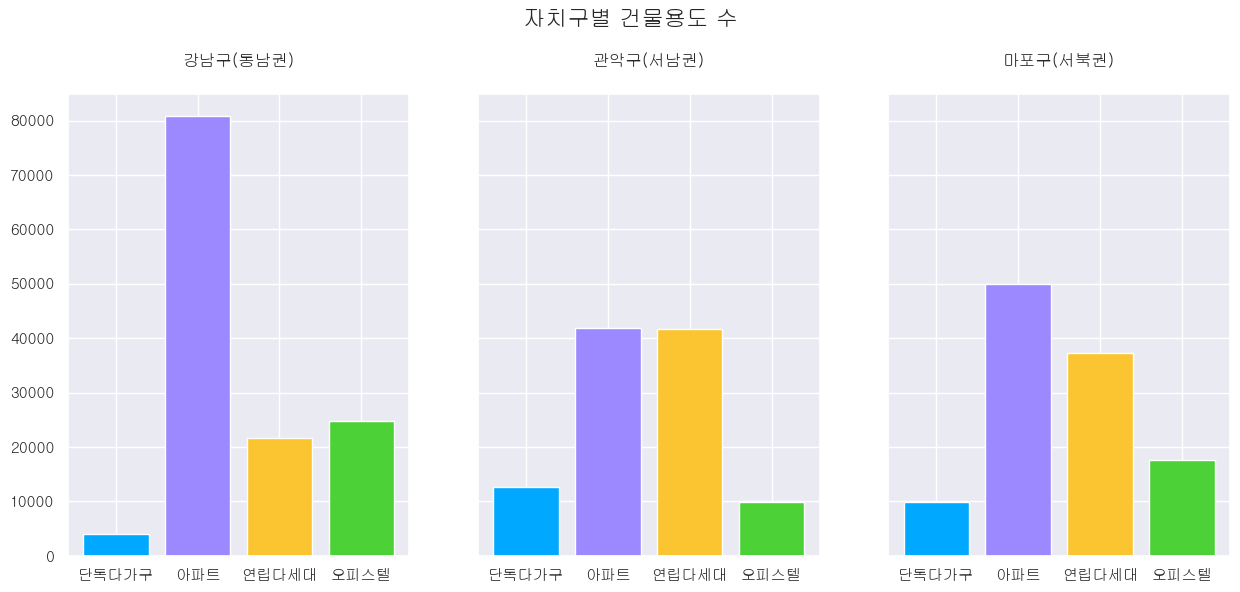

In [9]:
df3 = df.copy()

#원하는 열 선택
df3 = df3[["물건금액(만원)", "자치구명", "건물용도"]]

#강남구(동남권)
filtered_df1 = df3[df3['자치구명'] == '강남구']
filtered_df1 = filtered_df1.groupby('건물용도')[['자치구명']].count()
filtered_df1

#관악구(서남권)
filtered_df2 = df3[df3['자치구명'] == '관악구']
filtered_df2 = filtered_df2.groupby('건물용도')[['자치구명']].count()
filtered_df2

#마포구(서북권)
filtered_df3 = df3[df3['자치구명'] == '마포구']
filtered_df3 = filtered_df3.groupby('건물용도')[['자치구명']].count()

filtered_df3

#1x3 서브플롯 생성
fig, ax = plt.subplots(1, 3, figsize=(15, 6), sharey=True) #y축 범위 일치시키기

#막대 1
ax[0].bar(filtered_df1.index, filtered_df1['자치구명'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[0].set_title('강남구(동남권)', pad=20)

#막대 2
ax[1].bar(filtered_df2.index, filtered_df2['자치구명'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[1].set_title('관악구(서남권)', pad=20)

#막대 3
ax[2].bar(filtered_df3.index, filtered_df3['자치구명'], color=['#00a8ff', '#9c88ff', '#fbc531', '#4cd137'])
ax[2].set_title('마포구(서북권)', pad=20)

fig.suptitle('자치구별 건물용도 수', fontsize=16, fontweight='bold', y=1.02)

#그래프 출력
plt.show()

강남구는 대한민국 경제의 중심지로 국내 최고의 부동산 가격대를 자랑합니다.
아파트의 수가 독보적으로 많은 결과를 볼 수 있습니다.
아이파크삼성동, 힐튼타워, 아크로리버뷰 등 고가의 초호화 아파트가 많이 있습니다. 

관악구는 서울대학교, 숭실대학교, 중앙대학교 등 대학교가 많이 있는 지역입니다.
가격대가 다소 저렴한 편이어서 대학생 및 청년층들에게 있기있는 거주지입니다.

마포구는 연남동을 비롯해 예술, 문화분야에서 많은 사람들이 모이는 지역입니다.

아파트는 당연히 많을 것이라고 예상하였고, 예상보다 연립다세대 주택이 많은 결과를 확인했습니다. 

연립다세대 주택은 4층 이하의 건물로 보통 하나의 건물에 2개 이상의 주택이 연이어서 붙어있는 형태입니다.
건물의 외관을 보전하면서도 주거 환경을 조성할 수 있는 효율적인 주택 형태라고 합니다. 이런 장점들 때문에 서울과 같은 대도시에서 인기가 많다고 합니다.

실제로 그래프를 보면 서울에는 건물용도가 연립다세대인 건물의 거래가 많다는 결과를 확인할 수 있습니다.

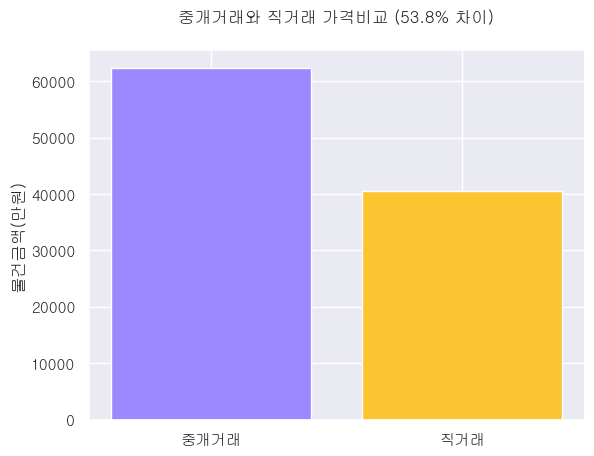

In [10]:
df4 = df.copy()

#원하는 열 선택
df4 = df4[["물건금액(만원)", "신고구분"]]

#그룹화
filtered_df = df4.groupby('신고구분')[['물건금액(만원)']].mean().reset_index()
filtered_df['물건금액(만원)'] = filtered_df['물건금액(만원)'].round(2)

#중개거래와 직거래 가격 차이 계산
diff = ((filtered_df.loc[0, '물건금액(만원)'] - filtered_df.loc[1, '물건금액(만원)']) / filtered_df.loc[1, '물건금액(만원)']) * 100
diff = round(diff, 2)

#그래프
plt.bar(filtered_df['신고구분'], filtered_df['물건금액(만원)'], color=['#9c88ff', '#fbc531'])
plt.title('중개거래와 직거래 가격비교 ({:.1f}% 차이)'.format(diff), pad=20)

#라벨 지정
plt.ylabel('물건금액(만원)')

plt.show()

부동산 중개거래와 직거래의 가격을 비교한 그래프입니다.
중개거래 가격이 직거래 가격보다 53.8% 높은 결과를 도출할 수 있었습니다.

중개거래는 부동산 중개업소를 통하기 때문에 중개 수수료가 발생합니다.
문제 발생 시 중재 역할도 수행합니다.

직거래는 부동산 중개업소를 통하지 않고 매도자와 매수자가 직접 거래합니다.
수수료가 발생하지 않지만 거래 과정에서 발생하는 문제는 당사자들이 직접 처리해야합니다.

안정성 측면을 고려한다면 중개거래를, 가격적인 측면을 고려한다면 직거래를 선택하는 것이
좋다는 결과가 도출되었습니다.

하지만 이 결과는 건물용도와 평수를 고려하지 않은 결과입니다.
예시로 강남에 있는 초고급 아파트는 아무래도 부동산을 거치는 경우가 많고, 직거래는 비교적 저렴한 건물을 거래하는 경우가 많을 것이기 때문에 이렇게 큰 차이가 발생한 것으로 판단됩니다. 

In [11]:
#한국은행 기준금리 데이터 불러오기
base_rate = pd.read_csv('1999~2023 한국은행 기준금리.csv')
base_rate = base_rate[base_rate['변경연도'] >= 2005]
base_rate.head()

,변경연도,변경일자,기준금리
0,2023,01월 13일,3.50
1,2022,11월 24일,3.25
2,2022,10월 12일,3.00
3,2022,08월 25일,2.50
4,2022,07월 13일,2.25


C:\Users\qksw5\AppData\Local\Temp\ipykernel_29748\867826436.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels, rotation=45)


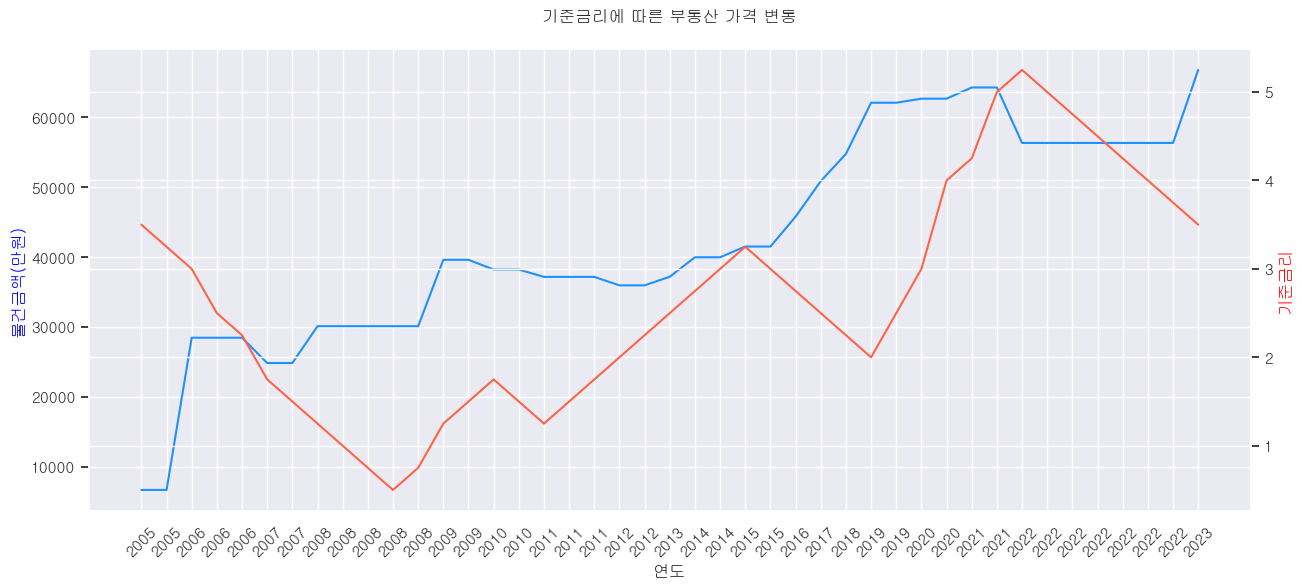

In [28]:
df5 = df.copy()

#원하는 열 선택
df5 = df5[["접수연도", "물건금액(만원)"]]

#그룹화
filtered_df = df5.groupby('접수연도')[['물건금액(만원)']].mean().reset_index()
filtered_df['물건금액(만원)'] = filtered_df['물건금액(만원)'].round(2)

#두 df 조인
merged_df = pd.merge(base_rate, filtered_df, left_on='변경연도', right_on='접수연도', how='inner')

#중복 열 제거
merged_df.drop('접수연도', axis=1, inplace=True)

#더블 차트
fig, ax1 = plt.subplots(figsize=(15, 6))

#첫번째 y축 (왼쪽)
ax1.set_xlabel('연도')
ax1.set_ylabel('물건금액(만원)', color='blue')
ax1.plot(range(len(merged_df)), merged_df['물건금액(만원)'][::-1], color='#1e90ff')

#두번째 y축 (오른쪽)
ax2 = ax1.twinx()
ax2.set_ylabel('기준금리', color='red')
ax2.plot(range(len(merged_df)), merged_df['기준금리'], color='#ff6348')

#x축 설정
x_labels = merged_df['변경연도'][::-1]  # x축 레이블을 역순으로 지정
ax1.set_xticklabels(x_labels, rotation=45)
ax1.set_xticks(range(len(x_labels)))

#제목
plt.title('기준금리에 따른 부동산 가격 변동', pad=20)

plt.show()

2005년부터 2023년까지 한국은행 기준금리와 서울시 부동산 매매 실거래가를 비교한 선 차트입니다.
그래프를 보면 부동산 가격과 기준금리는 역상관 관계를 갖는 것을 확인할 수 있습니다.

즉, 기준금리가 올라가면 부동산 가격이 내려가는 경향이 있고, 기준금리가 내려가면 부동산 가격이 오르는 경향이 있습니다.
대부분 집을 구매할 때 대출을 받기 때문에, 대출 이자가 저렴하면 많은 사람들이 대출을 받아 부동산을 구매하기 때문입니다.
반대로 대출 이자가 비싸면, 대출금 이자 부담 때문에 부동산의 공급의 늘어나고 가격이 하락하게 됩니다.

2007년~2010년에는 그 유명한 미국의 서브프라임 모기지 사태가 있었습니다.
서브프라임 모기지는 신용등급이 낮은 사람을 위한 고금리 주택 담보대출입니다.
미국이 저금리 정책을 종료하면서 부동산 버블이 꺼지기 시작했고, 대출을 상환하지 못하는 사람들이 많이 생겨나
결국 서브프라임 모기지 사태가 발생했습니다.

이는 세계 경제 시장에 타격을 주어 2008년 세계 금융 위기까지 이어지게 되었습니다.
따라서 한국도 경제 회복을 위한 대응책 중 하나로 금리를 낮추게 되었습니다.

또한, 2019년 7월에 한국은 코로나19 대유행으로 인한 경제 위기 상황이었습니다. 이에 따라 한국은 통화정책으로 기준금리를 낮추었습니다.
시각화된 결과를 보면, 금리가 급격하게 낮아질 때마다 주택 가격이 상승한다는 사실을 알 수 있습니다.